In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('filtered_data.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [16]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [17]:
scaler = StandardScaler()

In [18]:
from sklearn.model_selection import train_test_split as tts 
X_train,X_test,y_train,y_test = tts(X,y,test_size = 30)

<Axes: >

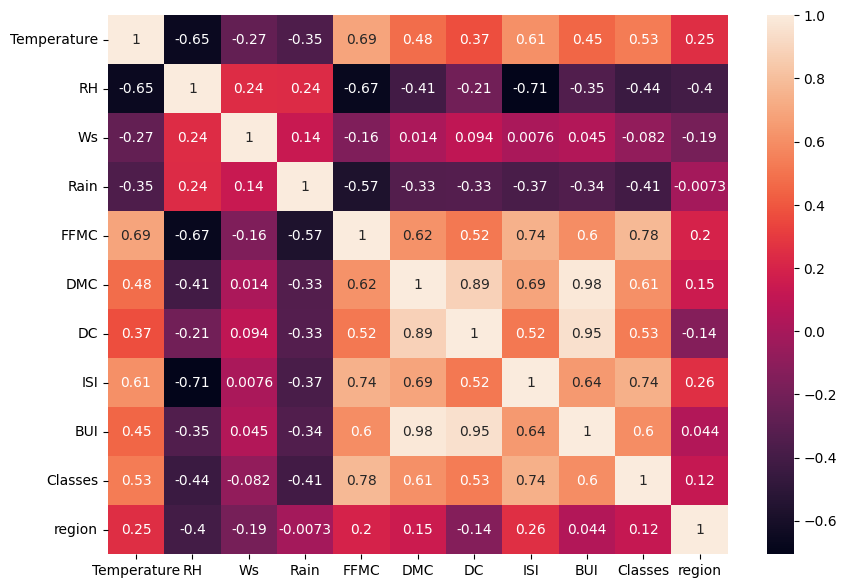

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(X_train.corr(),annot=True)

In [20]:
feature = set()
feature_y = []
max_limit = 0.85

In [21]:
for i in range(len(X_train.corr())):
    for j in range(i):
        if(abs((X_train.corr().iloc[i][j])>max_limit)):
            a = X_train.corr().iloc[i][j]
            print(X_train.columns[i],' ',X_train.columns[j],':',a)
            feature.add(X_train.columns[i])
            

DC   DMC : 0.8852734300318412
BUI   DMC : 0.9844931526136894
BUI   DC : 0.9514103953713093


In [22]:
X_train = X_train.drop(feature,axis=1)
X_test = X_test.drop(feature,axis=1)

In [23]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'region'],
      dtype='object')

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
regression = LinearRegression()
regression

LinearRegression()

In [26]:
regression.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = regression.predict(X_test)

In [28]:
regression.coef_

array([ 0.02512513, -0.1360537 ,  0.0504561 ,  0.04495041, -0.86266109,
        3.66032658,  4.84022171,  0.36442295, -0.39196709])

In [29]:
regression.intercept_

7.217370892018779

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adjusted = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(mse,'  ',mae,'  ',r2,'  ',adjusted)

1.0881240007748625    0.6526560577326345    0.9706186040957842    0.9573969759388871


In [31]:
#LASSO REGRESSION
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adjusted = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(mse,'  ',mae,'  ',r2,'  ',adjusted)

2.2599048530520283    1.2101037528800647    0.9389783157562035    0.911518557846495


In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adjusted = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(mse,'  ',mae,'  ',r2,'  ',adjusted)

1.094099399858802    0.6598230167336943    0.9704572570746305    0.9571630227582142


In [33]:
#ELASTIC NET
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(X_train,y_train)
y_pred = enet.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adjusted = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(mse,'  ',mae,'  ',r2,'  ',adjusted)

4.202562222127993    1.7391466016542572    0.8865229106494165    0.8354582204416539


In [34]:
import pickle as pkl 
pkl.dump(scaler,open('scaler.pkl','wb'))
pkl.dump(ridge,open('ridge.pkl','wb'))